In [30]:
#Assignment 2

In [31]:
print("Problem 1: The Falling Sphere (Data vs. Theory) ")

Problem 1: The Falling Sphere (Data vs. Theory) 


In [32]:
import numpy as np
data = np.loadtxt("drop_data.csv", delimiter=',', skiprows=1)

from scipy.optimize import curve_fit

In [33]:
#The Skiprow command tells Python to skip the first row with words in it and read the numerical data starting at the second row.

In [34]:
#Defining Constants

g = 9.81                   #meters/second^2
v_term = 40               #meters/second
#np.exp(x)                #This is how to use number e rasied to x in Python.
time = data[:,0]          #colon means "all" and 0 means starting from column zero (i.e. time)
velocity = data[:,1]      #colon means "all" and 1 means starting from column one (i.e. velocity)
                          #An array is rows and columns that look like this
                                    #array[rows, columns]
                          
    

#Defining Functions
def model_a_ideal(t):
    return g*t

def model_b_drag(t):
    return v_term*(1-np.exp((-g*t)/v_term))

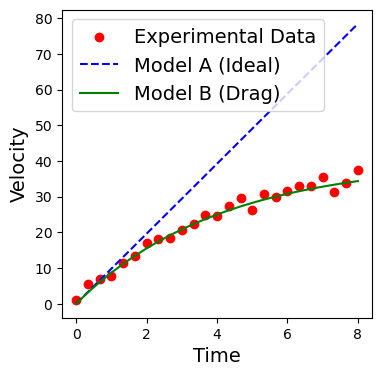

In [35]:
#Scatterplot

import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.xlabel("Time",fontsize = 14, color = "black")
plt.ylabel("Velocity", fontsize = 14, color = "black")

#Experimental Data (scatter plot)
plt.scatter(time, velocity, color = "red", label="Experimental Data")


#Model A (dashed line)
plt.plot(time, model_a_ideal(time), '--', color = "blue", label="Model A (Ideal)")
#The reason you put time, model_a_ideal(time) ....PS cannot ommit (time)
#It is a function of time! it's ----> time, FunctionName(time)


#Model B (solid line)
plt.plot(time, model_b_drag(time), '-', color = "green", label="Model B (Drag)")
plt.legend(fontsize=14)


In [36]:
#Questions:

#At what time (approximately) does the 'Ideal' model stop being a good representation of the real data?

print("The 'Ideal' model stops being a good representation of the real data approximately between the 2-4 second mark on the x-axis.")
print("The experimental data begins to curve away from the ideal data line.")


#Why?

print("This is because other physical components and physical constants such as 'drag' are not taken into account.")

The 'Ideal' model stops being a good representation of the real data approximately between the 2-4 second mark on the x-axis.
The experimental data begins to curve away from the ideal data line.
This is because other physical components and physical constants such as 'drag' are not taken into account.


In [37]:
print("Problem 2: Parameter Sweeping (Finding the Drag) ")

Problem 2: Parameter Sweeping (Finding the Drag) 


In [38]:
#Create a loop

Text(0.5, 1.0, 'Parameter Sweeping (Finding the Drag)')

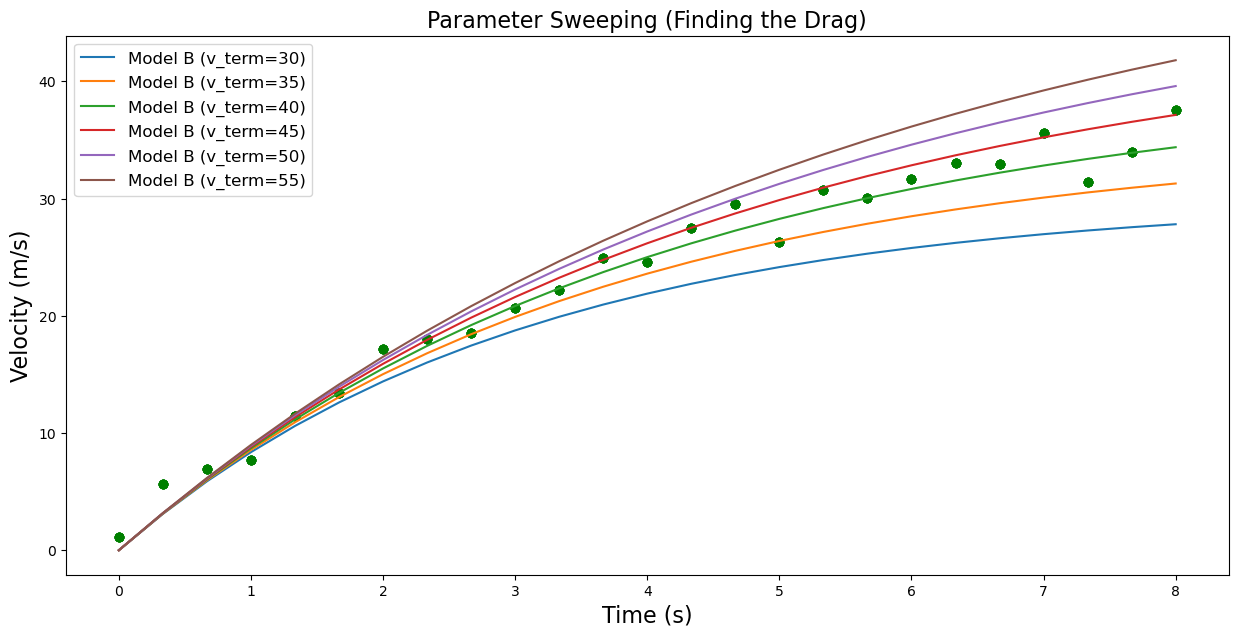

In [39]:
#Create a function plot_model_comparison(t_data, v_data, v_term_guess)

#defining something like this is a function

def plot_model_comparison(t_data, v_data, v_term_guess):
    g = 9.81        #meters/second^2
    model_b = v_term_guess*(1-np.exp((-g*t_data)/v_term_guess))
    plt.scatter(t_data, v_data, color = "green")
    plt.plot(t_data, model_b, '-', label =f'Model B (v_term={v_term_guess})')
    plt.xlabel("Time (s)", fontsize = 16, color = "black")
    plt.ylabel("Velocity (m/s)", fontsize = 16, color = "black")
    plt.legend(fontsize = 12)



#Inside a loop, call this function for three different guesses of terminal velocity: 30 m/s, 40m/s, and 50 m/s. 
#guesses are 30,40,50

v_guesses = [30,35,40,45,50,55]
plt.figure(figsize=(15,7))

for v_guess in v_guesses:
    plot_model_comparison(time, velocity, v_guess)

plt.title("Parameter Sweeping (Finding the Drag)", fontsize =16)

In [40]:
#Questions

#Based on your visual analysis, which terminal velocity best represents the physical object used in the experiment?

print("It looks like the terminal velocity is at 40 m/s. This is because the curve of guesses begins to spread away from the experimental data between 3 and 4 seconds.")

#Explain how a change in terminal velocity changes the "shape" of the curve on the graph.

print("A change in the terminal velocity changes the shape of the curve by flattening it out faster along the y axis. This is because terminal velocity is where the object stops accelerating, so smaller values flatten early and larger values flatten later.")

It looks like the terminal velocity is at 40 m/s. This is because the curve of guesses begins to spread away from the experimental data between 3 and 4 seconds.
A change in the terminal velocity changes the shape of the curve by flattening it out faster along the y axis. This is because terminal velocity is where the object stops accelerating, so smaller values flatten early and larger values flatten later.


In [41]:
print("Problem 3: Hooke’s law and estimating fits")

Problem 3: Hooke’s law and estimating fits


k=10 N/m to MSE = 423.5165
k=18 N/m to MSE = 509.6677
k=40 N/m to MSE = 573.6995


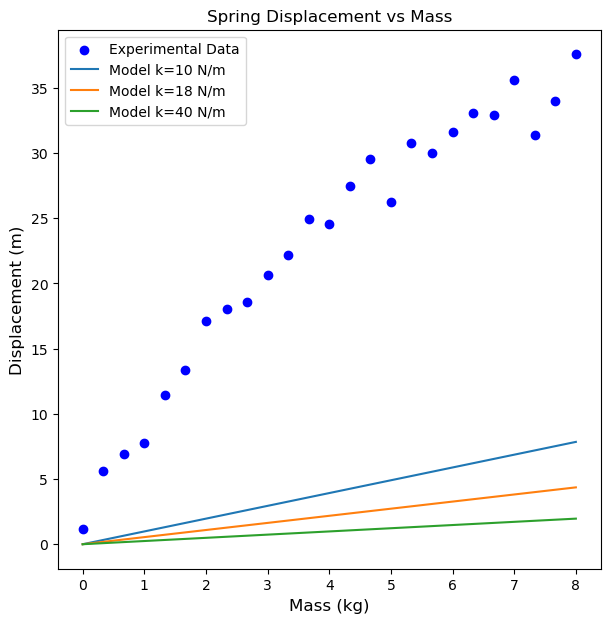

In [42]:
#Define our constants/define data

g = 9.81                      #meters/second^2
m = data[:,0]                 #kilograms    #colon means "all" and 0 means starting from column zero
displacement = data[:,1]      #meters       #colon means "all" and 1 means starting from column one

#define the function

def hookes_law(m, k):
    return ((m*g)/k)

#Residuals

def calculate_residuals(x_experimental,x_model):
    return x_experimental - x_model

def calculate_mse(x_experimental, x_model):
    residuals = x_experimental - x_model
    mse = np.mean(residuals**2)
    return mse

#Input different k values

k_values = [10,18,40]
plt.figure(figsize=(7,7))
plt.scatter(m, displacement, color='blue', label = 'Experimental Data')

for k in k_values:
    plt.plot(m, hookes_law(m,k), label=f'Model k={k} N/m')
    plt.xlabel("Mass (kg)", fontsize = 12)
    plt.ylabel("Displacement (m)", fontsize = 12)
    plt.title("Spring Displacement vs Mass", fontsize = 12)
    plt.legend(fontsize = 12)
    plt.legend(loc = "upper left")
    model_x = hookes_law(m,k)
    mse = calculate_mse(displacement, model_x)
    print(f"k={k} N/m to MSE = {mse:.4f}")


In [43]:
#Questions

#Which value of k creates a line that best follows the trend of the data? 

print("The best value of k is 10 N/m because it has the lowest MSE. Visually, it follows the trend of the experimental data best.")

#If you increase k, does the slope of your model line become steeper or flatter?
#How does the MSE change if you move k away from your "best" value?

print("As you increase k, the outputs are flatter. Larger k values create lines that look less like the experimental data.")
print("The MSE gets larger as k moves away from the best known value. This is because the k value no longer matches the experimental data closely.")

The best value of k is 10 N/m because it has the lowest MSE. Visually, it follows the trend of the experimental data best.
As you increase k, the outputs are flatter. Larger k values create lines that look less like the experimental data.
The MSE gets larger as k moves away from the best known value. This is because the k value no longer matches the experimental data closely.
